In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import pickle
from RMAB import *
from ThompsonSampling import ThompsonSampling

%matplotlib inline

True p
[[ 0.1  0.4]
 [ 0.2  0.1]
 [ 0.5  0.2]
 [ 0.5  0.8]
 [ 0.1  0.7]
 [ 0.2  0.8]
 [ 0.7  0.5]
 [ 0.9  0.8]]

Estimating the value of whittle...
Value(whittle) =  218.6

Running TS...
Average Value(TS) =  203.45

Maximal weights
[0.1, 0.4] 0.14
[0.2, 0.2] 0.36
[0.4, 0.2] 0.14
[0.5, 0.8] 1.0
[0.1, 0.6] 0.43
[0.2, 0.7] 0.86
[0.7, 0.5] 1.0
[0.9, 0.8] 1.0



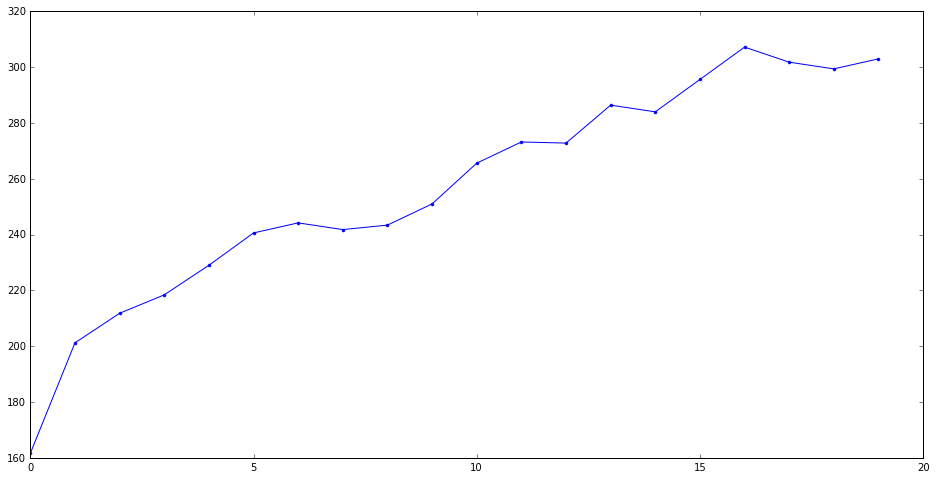

In [5]:
K = 8
N = 3
M = 100 # size of MCMC iterations
L = 100
m = 20 # T = m * L
baseline = 'whittle'

supp = np.linspace(0.1, 0.9, 9)
len_supp = len(supp)
posterior = np.ones((K, len_supp**2)) / len_supp**2


# Draw true p
p = np.random.choice(supp, 2*K).reshape(K, 2)
w = get_stable_dist(p)

print "True p"
print p
print 

rmab = RestlessMAB(K)
rmab.initialize(p, w)
policy = ThompsonSampling(rmab, N)

# Estimate the value of WIP
print "Estimating the value of {0}...".format(baseline)
value_baseline = 0.0
for _ in xrange(M):
    value_baseline += policy.run_baseline(p, w, L, baseline) / float(M)
print "Value({0}) = ".format(baseline), value_baseline
print 

print "Running TS..."
policy = ThompsonSampling(rmab, N, supp, posterior)
results = policy.runTS(L, m, baseline=baseline)
print "Average Value(TS) = ", np.average(results)
print 

print "Maximal weights"
policy.get_posterior_summary()
print

plt.figure(figsize=(16, 8))
plt.plot(range(m), (1 + np.arange(m)) * value_baseline - np.cumsum(results), '.-')